In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
img_t = torch.abs(torch.randn((3, 5, 5)))    #<-- creates a tensor of the given size with values from a noramlly distributed random variable 
img_t /= torch.max(torch.abs(img_t))/255
weights = torch.tensor([0.2126, 0.7152, 0.0722])    #<-- weights to transform colors into grayscale

This code imports the PyTorch library and creates a 3-dimensional tensor `img_t` of size `(3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The second line creates a tensor `weights` of size `(3,)` with the values `[0.2126, 0.7152, 0.0722]`. These values are the weights used to transform a color image into grayscale using a weighted sum of the color channels.

In [3]:
batch_t = torch.abs(torch.randn((2, 3, 5, 5)))     #<-- creates a tensor of the given size filled with RandN values
batch_t /= torch.max(torch.abs(batch_t))/255                                                        # shape [batch, channels, rows, columns]
                                                        # meaning we here have fabricated to "images" in the same batch

This code creates a 4-dimensional tensor `batch_t` of size `(2, 3, 5, 5)` with values drawn from a normal distribution using `torch.randn()`. 

The first dimension of size `2` represents the batch size, meaning that `batch_t` contains two images in the same batch. The second dimension of size `3` represents the number of color channels in each image, which is usually 3 for RGB images. The last two dimensions of size `5` represent the height and width of each image.

In [4]:
img_gray_naive = img_t.mean(-3)     #<-- averages the values in the 3rd dimention from the end, aka. the colors dimension
batch_grey_naive = batch_t.mean(-3) #<-- averages the values of the colors dimension, that's why we've chosen the 3rd from the end, it's because
                                    #    we may have a batch dimension, meaning the colors' order may be the 0th or the 1st, but it will be
                                    #    surely the 3rd from the end
            
img_gray_naive.shape, batch_grey_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

This code computes the grayscale version of an image tensor `img_t` and a batch of image tensors `batch_t` using a naive method of averaging the color channels. 

The first line computes the grayscale version of `img_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. This results in a tensor of shape `(5, 5)`.

The second line computes the grayscale version of `batch_t` by taking the mean of the values in the third dimension from the end, which corresponds to the color channels. Since `batch_t` has a batch dimension as the first dimension, the `mean` operation is applied to each image in the batch separately. This results in a tensor of shape `(2, 5, 5)`. 

The output of this code is a tuple containing the shapes of the grayscale image tensor and the grayscale batch tensor, which are `(5, 5)` and `(2, 5, 5)` respectively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


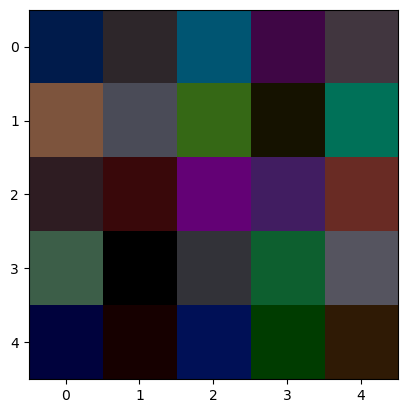

In [5]:
plt.imshow(img_t.permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8))  #<-- permute the dimensions of the tensor, so that the colors dimension is the last one
                                                                             #    so that imshow can plot it


In PyTorch, images are typically formatted as tensors with shape `(batch_size, channels, height, width)`, or `BCHW` for short. The `channels` dimension refers to the number of color channels in the image, which is usually 3 for RGB images (red, green, blue). 

However, when displaying an image using `matplotlib`, the color channels are expected to be the last dimension, so the tensor needs to be permuted to have shape `(height, width, channels)` or `HWC`.

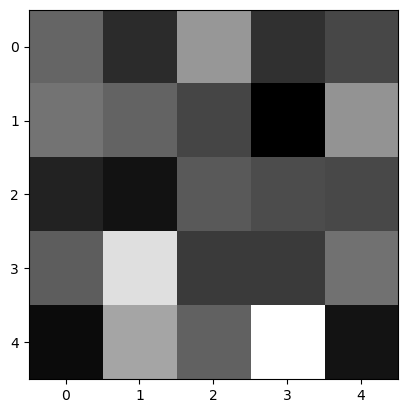

In [6]:
plt.imshow(img_gray_naive, cmap='gray'); #<-- cmap is the color map, we can choose the color map we want to use

This code displays a grayscale image `img_gray_naive` using the `imshow()` function from Matplotlib. The `cmap` parameter is used to specify the colormap to use for the image. In this case, the `'gray'` colormap is used, which displays the image in grayscale.

The `imshow()` function expects the input data to be in the form of a 2D array or a 3D array with the last dimension being 3 or 4 (for RGB or RGBA images, respectively). If the input data is a 2D array, it is assumed to be a grayscale image.

The `;` at the end of the line is used to suppress the output of the `imshow()` function, which would otherwise display the image object in the output cell.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


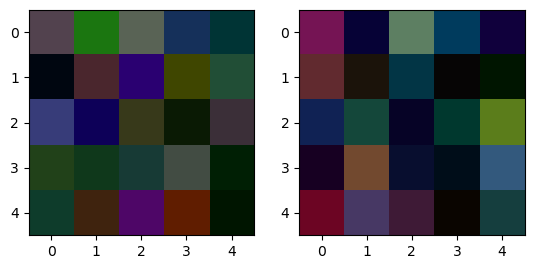

In [7]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_t[0].permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8), cmap = 'viridis');
ax[1].imshow(batch_t[1].permute(1, 2, 0).reshape(5, 5, 3).numpy().astype(np.int8), cmap = 'viridis');

This code displays two images from a PyTorch tensor `batch_t` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]`. The PyTorch tensor `batch_t[0]` is first permuted to have dimensions `(height, width, channels)` using `permute(1, 2, 0)`, then reshaped to have dimensions `(5, 5, 3)` using `reshape(5, 5, 3)`. Finally, the resulting tensor is converted to a NumPy array using `.numpy()` and cast to the `int8` data type using `.astype(np.int8)`. The resulting NumPy array is then displayed using `imshow()` with the `'viridis'` colormap.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image.

Note that casting the tensor to `int8` may not be appropriate for displaying the image, as it may result in loss of precision. It is usually better to cast the tensor to `float` instead.

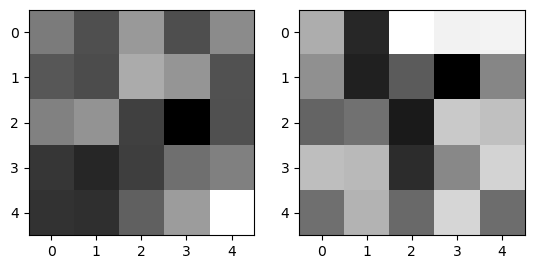

In [8]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_grey_naive[0], cmap='gray');
ax[1].imshow(batch_grey_naive[1], cmap='gray');

This code displays two grayscale images from a PyTorch tensor `batch_grey_naive` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]` using `imshow()` with the `'gray'` colormap. The grayscale image is obtained from `batch_grey_naive[0]`, which is assumed to be a 2D tensor representing a single grayscale image.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image, but with `batch_grey_naive[1]` instead.

Note that the `cmap` parameter is set to `'gray'` to indicate that the images are grayscale. If the images were in color, a different colormap would be used instead.

In [9]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_gray_weighted = (img_t * unsqueezed_weights).sum(-3)    #<-- multiplies the tensor by the weights and then sums the values in the colors dimension
batch_grey_weighted = (batch_t * unsqueezed_weights).sum(-3)
weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([3]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

This code calculates a weighted average of the pixel values in a PyTorch tensor `img_t` and a batch of tensors `batch_t`, using a weight tensor `weights`. The weight tensor `weights` has shape `(3,)`, which means it contains one weight value for each color channel (red, green, and blue).

The first line of code `unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)` unsqueezes the weight tensor twice along the last two dimensions, so that it has shape `(3, 1, 1)`. This allows the weight tensor to be broadcasted with the image tensors `img_t` and `batch_t` along the color channel dimension.

The second line of code `img_gray_weighted = (img_t * unsqueezed_weights).sum(-3)` multiplies the image tensor `img_t` by the unsqueezed weight tensor `unsqueezed_weights`, and then sums the resulting values along the color channel dimension (`-3`). This produces a weighted average of the pixel values in the image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`.

The third line of code `batch_grey_weighted = (batch_t * unsqueezed_weights).sum(-3)` does the same thing as the second line of code, but for a batch of tensors `batch_t`.

The last line of code `weights.shape, batch_t.shape, unsqueezed_weights.shape` prints the shapes of the weight tensor `weights`, the batch tensor `batch_t`, and the unsqueezed weight tensor `unsqueezed_weights`.

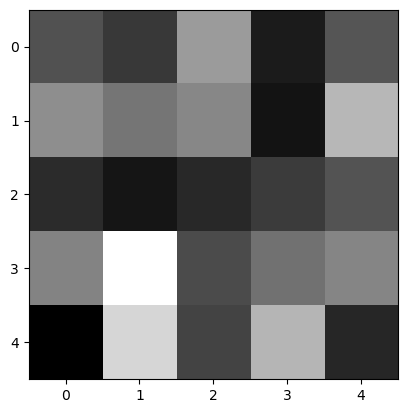

In [10]:
plt.imshow(img_gray_weighted, cmap='gray'); #<-- cmap is the color map, we can choose the color map we want to use

This code displays a grayscale image `img_gray_weighted` using the `imshow()` function from Matplotlib. The `cmap` parameter is used to specify the colormap to use for the image. In this case, the `'gray'` colormap is used, which displays the image in grayscale.

The `imshow()` function expects the input data to be in the form of a 2D array or a 3D array with the last dimension being 3 or 4 (for RGB or RGBA images, respectively). If the input data is a 2D array, it is assumed to be a grayscale image.

The `img_gray_weighted` tensor is obtained by calculating a weighted average of the pixel values in the original image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`. The resulting tensor is then displayed using `imshow()` with the `'gray'` colormap.

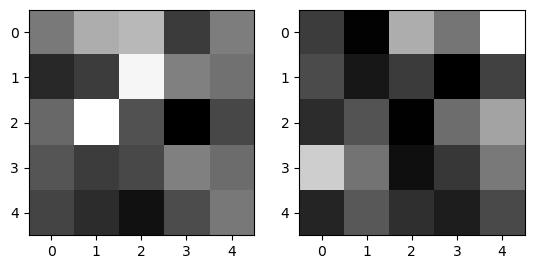

In [11]:
fig, ax = plt.subplots(1, 2)    #<-- creates a figure with 1 row and 2 columns
ax[0].imshow(batch_grey_weighted[0], cmap='gray');
ax[1].imshow(batch_grey_weighted[1], cmap='gray');

This code displays two grayscale images from a batch of PyTorch tensors `batch_grey_weighted` using the `imshow()` function from Matplotlib. The `fig, ax = plt.subplots(1, 2)` line creates a figure with 1 row and 2 columns, and returns a tuple containing the figure object and an array of two axes objects.

The first image is displayed on the first axis object `ax[0]` using `imshow()` with the `'gray'` colormap. The grayscale image is obtained from `batch_grey_weighted[0]`, which is assumed to be a 2D tensor representing a single grayscale image.

The second image is displayed on the second axis object `ax[1]` using the same process as the first image, but with `batch_grey_weighted[1]` instead.



In [12]:
img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
batch_gray_weighted_fancy.shape

torch.Size([2, 5, 5])

This code calculates a weighted average of the pixel values in a PyTorch tensor `img_t` and a batch of tensors `batch_t`, using a weight tensor `weights`. The weight tensor `weights` has shape `(3,)`, which means it contains one weight value for each color channel (red, green, and blue).

The `torch.einsum()` function is used to perform a matrix multiplication between the image tensors and the weight tensor. The `'...chw,c->...hw'` string specifies the matrix multiplication operation to be performed. The `...` notation is used to indicate that the operation should be performed over all dimensions of the input tensors except for the last two dimensions (`height` and `width`). The `c` dimension of the weight tensor is multiplied with the `chw` dimensions of the image tensors, and the resulting values are summed over the `c` dimension. The resulting tensor has the same shape as the input tensors, except for the last dimension (`color`), which is removed.

The resulting tensor `img_gray_weighted_fancy` is a weighted average of the pixel values in the image tensor `img_t`, where the weights are given by the values in the weight tensor `weights`. The same process is applied to the batch of tensors `batch_t` to obtain the tensor `batch_gray_weighted_fancy`.

The last line of code `batch_gray_weighted_fancy.shape` prints the shape of the tensor `batch_gray_weighted_fancy`, which is `(2, 5, 5)` in this case.

Named tensors in PyTorch allow users to give explicit names to tensor dimensions, which can be used to avoid the need to track dimensions by position. Named tensors use names to automatically check that APIs are being used correctly at runtime, providing extra safety.

Here is an example of how named tensors can be used in PyTorch:

```python
import torch

# Create a tensor with named dimensions
x = torch.randn({'batch': 32, 'channel': 3, 'height': 224, 'width': 224}, names=('batch', 'channel', 'height', 'width'))

# Sum over the height dimension
y = x.sum('height')

print(y.names)
```

This will output:

```python
('batch', 'channel', 'width')
```

In this example, we created a tensor `x` with named dimensions and then summed over the height dimension using `x.sum('height')`. The resulting tensor `y` has the same named dimensions as `x`, except that the height dimension has been removed.

In [13]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

/tmp/ipykernel_15381/2371314847.py:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /croot/pytorch_1686931851744/work/c10/core/TensorImpl.h:1788.)
  weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [14]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'batches' ,'channels', 'rows', 'columns')
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) ('batches', 'channels', 'rows', 'columns')


In [15]:
batch_named = batch_named.rename(None, ...)
print("batch named:", batch_named.shape, batch_named.names)

batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [16]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [17]:
img_aligned = img_named.align_as(batch_named)
print("img aligned:", img_aligned.shape, img_aligned.names)

img aligned: torch.Size([1, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [18]:
gray_named = (img_named * weights_aligned).sum('channels')   #<-- sum over channels
gray_named.shape, gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

In [19]:
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

(torch.Size([5, 5]), (None, None))

In [20]:
points_64 = torch.rand(5, dtype=torch.double)
points_short = points_64.to(torch.short) # = points_64.short()
points_64 * points_short # works from PyTorch 1.3 onwards

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

This code creates a PyTorch tensor `points_64` with shape `(5,)` and data type `torch.double`. The `torch.rand()` function is used to generate random values for the tensor.

The second line of code `points_short = points_64.to(torch.short)` creates a new tensor `points_short` with the same values as `points_64`, but with a different data type `torch.short`. The `to()` method is used to convert the data type of the tensor.

The third line of code `points_64 * points_short` performs an element-wise multiplication between the two tensors `points_64` and `points_short`. This operation works from PyTorch 1.3 onwards, because it requires the two tensors to have the same data type. The resulting tensor has the same shape as the input tensors, and contains the element-wise product of the corresponding elements in the input tensors.

In [21]:
a = torch.ones(3, 2)
a_t = a.transpose(0, 1)
a.shape, a_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

This code creates a PyTorch tensor `a` with shape `(3, 2)` and fills it with ones. The `torch.ones()` function is used to create the tensor.

The second line of code `a_t = a.transpose(0, 1)` creates a new tensor `a_t` that is the transpose of `a`. The `transpose()` method is used to transpose the tensor, and the arguments `0` and `1` specify the dimensions to swap. In this case, the first dimension (`3`) is swapped with the second dimension (`2`), resulting in a tensor with shape `(2, 3)`.

The last line of code `a.shape, a_t.shape` prints the shapes of the tensors `a` and `a_t`, which are `(3, 2)` and `(2, 3)` respectively.

These are the main categories of operations that can be performed on PyTorch tensors:

- Creation ops: Functions for constructing a tensor, like `ones` and `from_numpy`.
- Indexing, slicing, joining, mutating ops: Functions for changing the shape, stride, or content of a tensor, like `transpose`.
- Math ops: Functions for manipulating the content of the tensor through computations.
  - Pointwise ops: Functions for obtaining a new tensor by applying a function to each element independently, like `abs` and `cos`.
  - Reduction ops: Functions for computing aggregate values by iterating through tensors, like `mean`, `std`, and `norm`.
  - Comparison ops: Functions for evaluating numerical predicates over tensors, like `equal` and `max`.
  - Spectral ops: Functions for transforming in and operating in the frequency domain, like `stft` and `hamming_window`.
  - Other operations: Special functions operating on vectors, like `cross`, or matrices, like `trace`.
  - BLAS and LAPACK operations: Functions following the Basic Linear Algebra Subprograms (BLAS) specification for scalar, vector-vector, matrix-vector, and matrix-matrix operations.
- Random sampling: Functions for generating values by drawing randomly from probability distributions, like `randn` and `normal`.
- Serialization: Functions for saving and loading tensors, like `load` and `save`.
- Parallelism: Functions for controlling the number of threads for parallel CPU execution, like `set_num_threads`.

## 3.14 Exercises
1. Create a tensor a from list(range(9)). Predict and then check the size, offset,
and stride.

    * $a$ - Create a new tensor using b = a.view(3, 3). What does view do? Check
      that a and b share the same storage.
    * $b$ - Create a tensor c = b[1:,1:]. Predict and then check the size, offset, and
      stride.
      
2. Pick a mathematical operation like cosine or square root. Can you find a corresponding function in the torch library?
    * $a$ - Apply the function element-wise to a. Why does it return an error?
    * $b$ - What operation is required to make the function work?
    * $c$ - Is there a version of your function that operates in place?

1. 

$a$ - This code creates a PyTorch tensor `a` from a list of integers using the `torch.tensor()` function:



In [22]:
a = torch.tensor(list(range(9)))



The tensor `a` has size `(9,)`, offset `0`, and stride `(1,)`. This means that the tensor has one dimension of size 9, starts at index 0 in memory, and has a stride of 1 between adjacent elements.

$b$ - This code creates a new tensor `b` by reshaping `a` into a 3x3 tensor using the `view()` method:



In [23]:
b = a.view(3, 3)



The `view()` method returns a new tensor with the same data as the original tensor, but with a different shape. In this case, the tensor `b` has size `(3, 3)` and shares the same storage as `a` but has a stride of $(3, 1)$.

$c$ - This code creates a tensor `c` by selecting a sub-tensor of `b` using slicing:



In [24]:
c = b[1:, 1:]



The tensor `c` has size `(2, 2)`, offset `4`, and stride `(3, 1)`. This means that the tensor has two dimensions of size 2, starts at index 4 in memory (which corresponds to the element at row 1, column 1 of `b`), and has a stride of 3 between adjacent rows and a stride of 1 between adjacent columns.

2.

$a$ - PyTorch provides several mathematical functions, including cosine and square root. For example, the `torch.cos()` function can be used to compute the cosine of a tensor element-wise:



In [25]:
a_cos = torch.cos(a)



$b$ - The `torch.cos()` function expects the input tensor to be in radians, but the tensor `a` contains integers. To make the function work, we need to convert the tensor to radians first. For example, we can use the `torch.deg2rad()` function to convert the tensor to radians:



In [26]:
a_rad = torch.deg2rad(a)
a_cos = torch.cos(a_rad)



$c$ - Yes, there is an in-place version of the `torch.cos()` function called `torch.cos_()`. The in-place version modifies the input tensor directly instead of returning a new tensor:



In [27]:
a_rad.cos_()

tensor([1.0000, 0.9998, 0.9994, 0.9986, 0.9976, 0.9962, 0.9945, 0.9925, 0.9903])

## 3.15 Summary
1. Neural networks transform floating-point representations into other floating point representations. The starting and ending representations are typically
human interpretable, but the intermediate representations are less so.
2. These floating-point representations are stored in tensors.
3. Tensors are multidimensional arrays; they are the basic data structure in
PyTorch.